In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

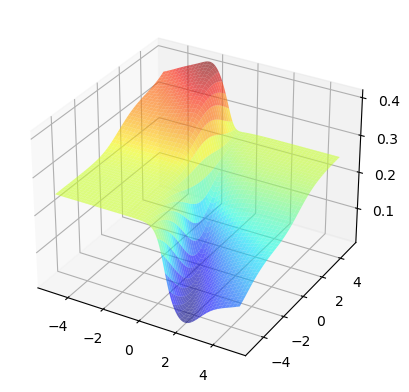

In [48]:
# x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8])
# y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1])

x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)

m = x_train.size

def z(w, b, x):
    return w * x + b

def f(w, b, x):
    z_value = z(w, b, x)
    return 1 / (1 + np.exp(-z_value))

def j_sample(w, b, x, y):
    return (f(w, b, x) - y) ** 2

def getCost(w, b, x: np.ndarray, y: np.ndarray):
    sum = 0
    for i in range(m):
        sum = sum + j_sample(w, b, x_train[i], y_train[i])

    return sum / (2 * m)


w_samples = np.arange(-5, 5, 0.01)
b_samples = np.arange(-5, 5, 0.01)

w_mesh, b_mesh = np.meshgrid(w_samples, b_samples)
costs = np.empty(w_mesh.shape)

for i in range(w_mesh.shape[0]):
    for j in range(w_mesh.shape[1]):
        w = w_mesh[i, j]
        b = b_mesh[i, j]
        costs[i, j] = getCost(w, b, x_train, y_train)

# costs = costs.reshape(5)

fig = plt.figure()
# fig.canvas.toolbar_visible = False
# fig.canvas.header_visible = False
# fig.canvas.footer_visible = False
ax = fig.add_subplot(1, 1, 1, projection='3d')

# IMPORTANT: pass not original w and b vectors, but mesh matrices!
ax.plot_surface(w_mesh, b_mesh, costs, alpha=0.6,cmap=cm.jet,)